In [5]:
RANDOM_STATE = 85

The goal is to check what division into 'bad' and 'good' topics works better. 

    * Select 10 random topics from ‘good’ and ‘bad’, look at their comments, and annotate topics manually; calculate a proportion of how many topics are indeed ‘good’ and ‘bad’.

## Evaluate bad-good comments division

In [13]:
import pandas as pd

In [14]:
path = '../other_dumps/comments'

In [15]:
# input: file with all comments and their scores
file = 'VER1_all_comments_to_theories_with_scores.csv'

In [16]:
df_to_evaluate = pd.read_csv(f'{path}/{file}')

In [17]:
df_to_evaluate.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,1
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,1
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,1


<AxesSubplot:>

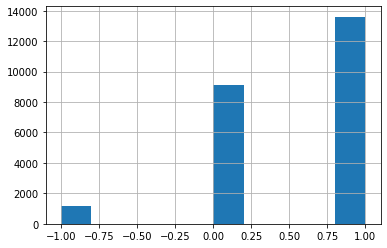

In [6]:
df_to_evaluate.comment_grades.hist()

In [ ]:
# we evaluate not only the work of sentiment systems but also how the identification of 'suspicious' comments works
# so we look not at just 'positive' and 'negative' comments, but at those that have 'count_bad' > 0 

In [13]:
df_good_comments = df_to_evaluate[df_to_evaluate.comment_grades == 1]
df_good_comments = df_good_comments[df_good_comments.count_bad > 1]

df_bad_comments = df_to_evaluate[df_to_evaluate.comment_grades == -1]
df_bad_comments = df_bad_comments[df_bad_comments.count_bad > 1]

In [16]:
print(df_bad_comments.shape[0], df_good_comments.shape[0])

495 778


In [20]:
# now we select 20 random from good and 20 random from bad and show them prettily for evaluation
for el in df_good_comments.sample(20, random_state=RANDOM_STATE).text.values:
    print(el)
    print('<------------------------------>')

My intro to programming 1 professors from a couple years ago should have explained classes like this, great!
<------------------------------>
I was still a bit confused on how to apply these concepts to my code but will learn as I go with where is the best scenario to apply these operators/ evaluations.
<------------------------------>
best link for learning?
<------------------------------>
Great explanation of the Manifest file. Concise and straightforward as always. Nice!
<------------------------------>
Would be great to have some more explanation along with examples for hiding versus overriding
<------------------------------>
this theory is good i was studying 2011 information technology some words im familear with
<------------------------------>
This is one of the best articles I've read on this website. Thumbs up for the Effective Java reference as well. Great job
<------------------------------>
Hi! It can be called however you want to call it. 
(args_for_function) == the arg

In [21]:
for el in df_bad_comments.sample(20, random_state=RANDOM_STATE).text.values:
    print(el)
    print('<------------------------------>')

It's kinda hard to understand (I am not from CS background)
<------------------------------>
Incorrect grammar is confusing in a couple cases. Could use a rewrite.
<------------------------------>
It's never explained how do we combine the subarrays. While it's intuitive to merge subarrays like: {21} and {30}, it's much harder to tell how would we go about merging {19, 21, 23, 30} with {11, 23, 28}. Saying "we merge two subarrays to produce a sorted input array: { 11, 19, 21, 23, 23, 28, 30 }" is not an explanation.
<------------------------------>
poor explanations
<------------------------------>
Very hard to understand.
<------------------------------>
I found two difficult words in two hint boxes.
box1(blue colored box)
......." commented by placing the caret on the line and pressing Ctrl /." In this sentence word, 'caret' is difficult to understand for a beginner maybe we can replace it with 'cursor'.
box2
....... "which might not be that simple for padawans." ...... In this sente

## Evaluate bad-good topics division

In [ ]:
# input: topics with target features + file with comments

In [22]:
file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'
file_with_targets = './new_cleaned/train_corpus/target_features/topic_ids_with_target_features_VER1.csv'

In [23]:
df_with_targets = pd.read_csv(file_with_targets)
df_with_comments = pd.read_csv(file_with_comments)

In [24]:
df_with_targets.head()

,topic_id,target
0,1536,0
1,515,0
2,1540,0
3,1029,0
4,1030,0


In [25]:
sample_good_topics = df_with_targets[df_with_targets.target == 0].sample(3, random_state=RANDOM_STATE)
sample_bad_topics = df_with_targets[df_with_targets.target == 1].sample(3, random_state=RANDOM_STATE)

In [32]:
for i, row in sample_good_topics.iterrows():
    all_comments_to_topic = df_with_comments[df_with_comments.topic_id == row.topic_id]
    print('##################' * 2 + ' ' + str(row.topic_id) + ' ' + '##################' * 2)
    for el in all_comments_to_topic.text.values:
        if len(el) < 50000:
            print(el)
            print('<------------------------------>')
    print()

#################################### 213 ####################################
I love the way the tutoring is taken stepwisely, for instance, taking about data types in variables you say: Variables can store not only strings, but also numbers, characters, and other data types, which we will meet further. 
You don't introduce everything at once, and that's nice!
<------------------------------>
I would prefer a bit more theory.
<------------------------------>
да и то что, разработчики языка в принципе создали ресурс по обучению языку, уже большой и полезный вклад
<------------------------------>
The instructions were very clear and easy to understand.
<------------------------------>
Maybe we should use the term *read-only* instead of *immutable* here.  See also: https://kotlinlang.org/docs/reference/basic-syntax.html#defining-variables
<------------------------------>
Systems Developers love to make terminlogy more complicated than it really needs to be.
<------------------------------

## All together for new files

### Prepare things

In [1]:
import pandas as pd

In [2]:
file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'

In [36]:
def show_20_comments(df_to_evaluate_with_comment_scores, mode='good', random_state=RANDOM_STATE):
    # the final score of the comment is supposed to be in the column 'comment_grades'
    # the suspiciousness of the comment is supposed to be in the column 'count_bad'
    if mode == 'good':
        sentiment = 1
    elif mode == 'bad':
        sentiment = -1
    elif mode == 'neutral':
        sentiment = 0
    else:
        raise AssertionError('mode not one among [good, bad, neutral]')
    
    df_with_comments = df_to_evaluate_with_comment_scores[df_to_evaluate_with_comment_scores.comment_grades == sentiment]
    #df_with_comments = df_with_comments[df_with_comments.count_bad > 1] -- don't have this line for VER5
    
    sample_df = df_with_comments.sample(20, random_state=random_state)
    for i, row in sample_df.iterrows():
        text = row.text
        comment_id = row.id
        print(comment_id)
        print(text)
        print('<------------------------------>')
    return sample_df

In [13]:
def show_comments_for_10_topics(df_with_comments, df_with_targets, mode='good', random_state=RANDOM_STATE):
    if mode == 'good':
        target = 0
    elif mode == 'bad':
        target = 1
    else:
        raise AssertionError('mode not one among [good, neutral]')
        
    sample_topics = df_with_targets[df_with_targets.target == target].sample(10, random_state=random_state)
    
    for i, row in sample_topics.iterrows():
        all_comments_to_topic = df_with_comments[df_with_comments.topic_id == row.topic_id]
        print(str(row.topic_id))
        print('##################' * 2 + ' ' + \
              str(row.topic_id) + ' ' + '##################' * 2)
        for j, el in enumerate(all_comments_to_topic.text.values):
            if len(el) < 1000:
                print(str(j+1) + ' ' + el)
                print('<------------------------------>')
        print()
    return sample_topics

In [44]:
def get_df_with_topics(version, random_state=RANDOM_STATE):
    file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'
    file_with_targets = f'./new_cleaned/train_corpus/target_features/topic_ids_with_target_features_{version}.csv'

    df_with_comments = pd.read_csv(file_with_comments)
    df_with_targets = pd.read_csv(file_with_targets)
    
    df_with_good_topics = df_with_targets[df_with_targets.target == 0].sample(10, random_state=random_state)
    df_with_good_topics['version'] = [version] * df_with_good_topics.shape[0]
    
    df_with_bad_topics = df_with_targets[df_with_targets.target == 1].sample(10, random_state=random_state)
    df_with_bad_topics['version'] = [version] * df_with_bad_topics.shape[0]
    
    common_df = pd.concat([df_with_good_topics, df_with_bad_topics])
    common_df.to_csv(f'../other_dumps/comments/evaluation/{version}_topics_division.csv', index=False)

In [32]:
def get_df_with_comments(version, random_state=RANDOM_STATE):
    file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'
    file_with_comments_with_scores = f'../other_dumps/comments/{version}_all_comments_to_theories_with_scores.csv'

    df_with_comments = pd.read_csv(file_with_comments)
    df_with_comments_with_scores = pd.read_csv(file_with_comments_with_scores)
    
    df_with_good_comments = show_20_comments(df_with_comments_with_scores, mode='neutral')
    df_with_good_comments = df_with_good_comments[['id', 'text', 'comment_grades']]
    df_with_good_comments['version'] = [version] * df_with_good_comments.shape[0]
    
    df_with_bad_comments = show_20_comments(df_with_comments_with_scores, mode='bad')
    df_with_bad_comments = df_with_bad_comments[['id', 'text', 'comment_grades']]
    df_with_bad_comments['version'] = [version] * df_with_bad_comments.shape[0]
    
    common_df = pd.concat([df_with_bad_comments, df_with_good_comments])
    common_df.to_csv(f'../other_dumps/comments/evaluation/{version}_comments_division.csv', index=False)

### Run things separately

Write results of evaluation here: https://docs.google.com/spreadsheets/d/1l_-Ta0FLwBGJwRcincPdfy176QhUoCAfVxA4iJSM5I0/edit#gid=0

In [23]:
# change here
VERSION = 'VER1'

In [ ]:
file_with_comments_with_scores = f'../other_dumps/comments/{VERSION}_all_comments_to_theories_with_scores.csv'
file_with_targets = f'./new_cleaned/train_corpus/target_features/topic_ids_with_target_features_{VERSION}.csv'

In [9]:
df_with_comments = pd.read_csv(file_with_comments)
df_with_comments_with_scores = pd.read_csv(file_with_comments_with_scores)
df_with_targets = pd.read_csv(file_with_targets)

In [14]:
df_with_good_comments = show_20_comments(df_with_comments_with_scores, mode='good')

130733
My intro to programming 1 professors from a couple years ago should have explained classes like this, great!
<------------------------------>
1230840
I was still a bit confused on how to apply these concepts to my code but will learn as I go with where is the best scenario to apply these operators/ evaluations.
<------------------------------>
1577651
best link for learning?
<------------------------------>
786923
Great explanation of the Manifest file. Concise and straightforward as always. Nice!
<------------------------------>
1192680
Would be great to have some more explanation along with examples for hiding versus overriding
<------------------------------>
655777
this theory is good i was studying 2011 information technology some words im familear with
<------------------------------>
33067
This is one of the best articles I've read on this website. Thumbs up for the Effective Java reference as well. Great job
<------------------------------>
423546
Hi! It can be called ho

In [21]:
df_with_bad_comments = show_20_comments(df_with_comments_with_scores, mode='bad')

858639
It's kinda hard to understand (I am not from CS background)
<------------------------------>
296397
Incorrect grammar is confusing in a couple cases. Could use a rewrite.
<------------------------------>
456297
It's never explained how do we combine the subarrays. While it's intuitive to merge subarrays like: {21} and {30}, it's much harder to tell how would we go about merging {19, 21, 23, 30} with {11, 23, 28}. Saying "we merge two subarrays to produce a sorted input array: { 11, 19, 21, 23, 23, 28, 30 }" is not an explanation.
<------------------------------>
582875
poor explanations
<------------------------------>
364377
Very hard to understand.
<------------------------------>
68628
I found two difficult words in two hint boxes.
box1(blue colored box)
......." commented by placing the caret on the line and pressing Ctrl /." In this sentence word, 'caret' is difficult to understand for a beginner maybe we can replace it with 'cursor'.
box2
....... "which might not be that s

In [42]:
good_topics = show_comments_for_10_topics(df_with_comments, df_with_targets, mode='good')

213
#################################### 213 ####################################
1 I love the way the tutoring is taken stepwisely, for instance, taking about data types in variables you say: Variables can store not only strings, but also numbers, characters, and other data types, which we will meet further. 
You don't introduce everything at once, and that's nice!
<------------------------------>
2 I would prefer a bit more theory.
<------------------------------>
3 да и то что, разработчики языка в принципе создали ресурс по обучению языку, уже большой и полезный вклад
<------------------------------>
4 The instructions were very clear and easy to understand.
<------------------------------>
5 Maybe we should use the term *read-only* instead of *immutable* here.  See also: https://kotlinlang.org/docs/reference/basic-syntax.html#defining-variables
<------------------------------>
6 Systems Developers love to make terminlogy more complicated than it really needs to be.
<--------------

In [43]:
good_topics.head()

,topic_id,target
158,213,0
214,1835,0
66,1106,0
329,505,0
157,212,0


In [16]:
# show_20_comments(df_with_comments_with_scores, good=False)
show_20_comments_ver5(df_with_comments_with_scores, good=False)

1 lambda is confusing because the reason to use it is not given clearly. the human brain only makes the effort to remember things when they are useful. I get the synthetic sugar part, but it does not explain why I should go through all the trouble to reduce the arguments of a function
<------------------------------>
2 Everything is OK, but this phrase is quite misleading: "You need to write the command itself, the ID of the commit you want to *delete*, and the name of the file where the wrong change was made.".

We don't delete that commit, we select the file state on that commit.
<------------------------------>
3 Provide the complete code and then output as it is not helpful to write programs in problem.
<------------------------------>
4 Really hard to understand.
<------------------------------>
5 The chapter with elif blocks is very detailed. They even inserted pictures. Such a detailed description is lacking in other topics, where a very complex material is presented in a couple

### Run to get the evaluation files

#### With comments

In [30]:
get_df_with_comments('VER1')  # has 'good' comments

130733
My intro to programming 1 professors from a couple years ago should have explained classes like this, great!
<------------------------------>
1230840
I was still a bit confused on how to apply these concepts to my code but will learn as I go with where is the best scenario to apply these operators/ evaluations.
<------------------------------>
1577651
best link for learning?
<------------------------------>
786923
Great explanation of the Manifest file. Concise and straightforward as always. Nice!
<------------------------------>
1192680
Would be great to have some more explanation along with examples for hiding versus overriding
<------------------------------>
655777
this theory is good i was studying 2011 information technology some words im familear with
<------------------------------>
33067
This is one of the best articles I've read on this website. Thumbs up for the Effective Java reference as well. Great job
<------------------------------>
423546
Hi! It can be called ho

In [31]:
get_df_with_comments('VER2')  # has 'good' comments

1098289
very well explained. wow
<------------------------------>
1147407
I just want to say - some of these SQL topics are really well written. Good job to the authors.
<------------------------------>
1260012
I reposted my answer under the main question, if this solves your issue please remember to close the bounty by selecting the best answer.
<------------------------------>
406133
Is Java the best choice for Android or is it worth learning Kotlin?
<------------------------------>
1262722
If you want more, we have great lesson about it, here is it: https://hyperskill.org/learn/step/16036
Unfortunatelly, IntelliJ Edu Eddition doesn't support version Java higher than 11.
Anyway, it's good to now about it, at the moment the most up-to-date version java is 17
<------------------------------>
1577635
best link for learning?
<------------------------------>
697777
can someone recommend a very good book to read further on design principles in much greater detail with good examples?
<-----

In [33]:
get_df_with_comments('VER3')  # has only 'neutral' comments

565637
I believe this statement is only partially correct:
    "the default constructor of a subclass automatically calls the no-argument constructor of the superclass."
According to the Oracle Java Tutorial (https://docs.oracle.com/javase/tutorial/java/IandI/super.html),
    "Note: If a constructor does not explicitly invoke a superclass constructor, the Java compiler automatically inserts a call to the no-argument constructor of the superclass."
In other words, this applies to *all* subclass constructors (not just the default constructor) that don't explicitly invoke a superclass constructor. (The default constructor is just a special case because it doesn't explicitly invoke anything.)

currykid's comment below is almost right, except I think they should have said "...unless an INaccessible..." instead of "...unless an accessible..."
<------------------------------>
1493224
For me it was explained quite clearly. Which part is difficult for you to understand?
<-----------------------

In [34]:
get_df_with_comments('VER4')  # has only 'neutral' comments

1327820
For those who don't wanna click links, this was Cetin CAKIR's explanation.

Well, 11 % 5 = 1 since 5*2 = 10 and when you divide 11 by 10 you obtain a remainder of 1. You can think of it as the closest you can go 
without going over.

As for 11 % -5, well that answer differs from one programming language to another.

For Python it's -4 because it will always return the value of the divisor and it's because 5*3 = 15 and when you divide 11 by 25 in Python you obtain a remainder of -4 (since it must be negative because the divisor was negative) so we have 15 - 4 = 11.

It's worth noting that the formal mathematical definition states that b is a positive integer.
<------------------------------>
444432
As always during learning new languges we over use sth (for example tenses). The same is with programing languages on the begining we over use loops and etc.
<------------------------------>
1491169
getString(1) return the value of the first column and this value is of type String so 

In [37]:
get_df_with_comments('VER5')  # has only 'neutral' comments

254216
That's one of the main reasons to define such a constraint in the first place. You want to make sure that each row has a value in the corresponding column. As a result of execution of a query without a value in the column, you'll get an error.
<------------------------------>
634524
End of §2
"As an example, we will write a small echo-server which get messages from clients and then send them back" -> "gets" and "sends"
<------------------------------>
907419
CEILING column is wrong. CEILING for -1.1 = -1, and for -1.6 = -1
<------------------------------>
999500
I didn't fully grasp the varargs-part and the difference between arguments and parameters.
<------------------------------>
604852
More info around both use cases would be great. I kind of understand it? But its so brief its not very helpful.
<------------------------------>
946175
"undefined is printed because the parameter a was missing in the written function."
In Java, it's called "function call". The parameter is mi

In [39]:
get_df_with_comments('VER5_with_likes')  # has only 'neutral' comments

254216
That's one of the main reasons to define such a constraint in the first place. You want to make sure that each row has a value in the corresponding column. As a result of execution of a query without a value in the column, you'll get an error.
<------------------------------>
634524
End of §2
"As an example, we will write a small echo-server which get messages from clients and then send them back" -> "gets" and "sends"
<------------------------------>
907419
CEILING column is wrong. CEILING for -1.1 = -1, and for -1.6 = -1
<------------------------------>
999500
I didn't fully grasp the varargs-part and the difference between arguments and parameters.
<------------------------------>
604852
More info around both use cases would be great. I kind of understand it? But its so brief its not very helpful.
<------------------------------>
946175
"undefined is printed because the parameter a was missing in the written function."
In Java, it's called "function call". The parameter is mi

In [40]:
# collect them into one df
path = '../other_dumps/comments/evaluation'

common_df = pd.DataFrame(columns=['id', 'text', 'comment_grades', 'version'])

for version in ['VER1', 'VER2', 'VER3', 'VER4', 'VER5', 'VER5_with_likes']:
    file = f'{path}/{version}_comments_division.csv'
    df = pd.read_csv(file)
    common_df = pd.concat([common_df, df])
    
common_df.to_csv(f'{path}/comments_all_together.csv', index=False)

In [41]:
print(common_df.shape[0])
common_df.head()

240


,id,text,comment_grades,version
0,858639,It's kinda hard to understand (I am not from C...,-1,VER1
1,296397,Incorrect grammar is confusing in a couple cas...,-1,VER1
2,456297,It's never explained how do we combine the sub...,-1,VER1
3,582875,poor explanations,-1,VER1
4,364377,Very hard to understand.,-1,VER1


#### With topics

In [45]:
for version in ['VER1', 'VER2', 'VER3', 'VER4', 'VER5', 'VER5_with_likes']:
    get_df_with_topics(version)

In [47]:
# collect them into one df
path = '../other_dumps/comments/evaluation'

common_df = pd.DataFrame(columns=['topic_id', 'target', 'version'])

for version in ['VER1', 'VER2', 'VER3', 'VER4', 'VER5', 'VER5_with_likes']:
    file = f'{path}/{version}_topics_division.csv'
    df = pd.read_csv(file)
    common_df = pd.concat([common_df, df])
    
common_df.to_csv(f'{path}/topics_all_together.csv', index=False)

In [48]:
all_topics_set = set(common_df.topic_id.values)

In [59]:
# get a df with comments to each topic
path = '../other_dumps/comments/evaluation'
file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'
df_with_comments = pd.read_csv(file_with_comments)

all_topics_with_comments = pd.DataFrame(columns=['topic_id', 'id', 'text'])

for topic in all_topics_set:
    all_comments_to_topic = df_with_comments[df_with_comments.topic_id == topic][['topic_id', 'id', 'text']]
    
    id_to_drop = []
    for i, row in all_comments_to_topic.iterrows():
        if len(row.text) > 1000:
            id_to_drop.append(i)
    all_comments_to_topic = all_comments_to_topic.drop(id_to_drop)
    
    all_topics_with_comments = pd.concat([all_topics_with_comments, all_comments_to_topic])

all_topics_with_comments.to_csv(f'{path}/comments_for_topics_all_together.csv', index=False)
all_topics_with_comments.head()

,topic_id,id,text
14373,517.0,51006,"typo ""DateFIeld"""
14451,517.0,256845,Looks like there was a typo in once of the exa...
14495,517.0,393936,# All home games for Falmouth Falcons\nTeam.ob...
14496,517.0,393940,'Game.objects' have to be in snippet below.\n\...
14609,517.0,529956,"""The ""gt"" lookup is a reduction of the word gr..."


## Cohen's Kappa and evaluation results

In [85]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

In [76]:
file = '/home/anna/Downloads/Evaluation_topics_all_together_RESULTS.csv'

In [77]:
df_with_scores = pd.read_csv(file)

In [78]:
df_with_scores.head(-5)

,topic_id,target,version,My eval,ANNOTATORS,same?
0,8,1,VER5_with_likes,1,1,1
1,14,1,VER3,1,1,1
2,32,1,VER5_with_likes,1,1,1
3,37,1,VER5,1,1,1
4,65,1,VER3,1,1,1
...,...,...,...,...,...,...
110,1713,0,VER5,0,0,1
111,1744,0,VER5_with_likes,0,0,1
112,1760,1,VER3,1,1,1
113,1783,0,VER2,0,0,1


In [79]:
cohen_kappa_score(df_with_scores['My eval'].values, df_with_scores['ANNOTATORS'].values)

0.9146757679180888

In [80]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [87]:
for ver in ['VER1', 'VER2', 'VER3', 'VER4', 'VER5', 'VER5_with_likes']:
    print(ver)
    df_version = df_with_scores[df_with_scores.version == ver]
    tp, fp, tn, fn = perf_measure(df_version['My eval'].values, df_version['target'].values)
    print(tp, tn, fp, fn, sep='\n')
    print()

VER1
8
8
2
2

VER2
8
9
2
1

VER3
9
6
1
4

VER4
7
8
3
2

VER5
10
7
0
3

VER5_with_likes
9
6
1
4



In [88]:
for ver in ['VER1', 'VER2', 'VER3', 'VER4', 'VER5', 'VER5_with_likes']:
    print(ver)
    df_version = df_with_scores[df_with_scores.version == ver]
    f_score = f1_score(df_version['My eval'].values, df_version['target'].values)
    print(f_score)
    print()

VER1
0.8000000000000002

VER2
0.8421052631578948

VER3
0.7826086956521738

VER4
0.7368421052631577

VER5
0.8695652173913044

VER5_with_likes
0.7826086956521738



## Some statistics for thesis

In [1]:
path = '../other_dumps/comments/'

In [2]:
import pandas as pd

In [7]:
f = 'VER1_all_comments_to_theories_with_scores.csv'
df = pd.read_csv(path + f)
df.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,1
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,1
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,1


In [11]:
comment_grades = []

for i, row in df.iterrows():
    if row.count_bad == 0:
        comment_grades.append(0.5)
        
    else:
        comment_grades.append(row.comment_grades)

df['comment_grades'] = comment_grades

<AxesSubplot:>

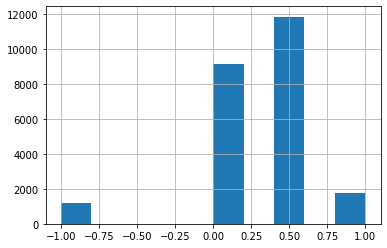

In [12]:
df.comment_grades.hist()

<AxesSubplot:>

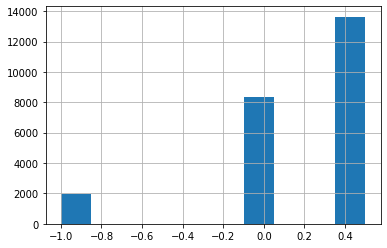

In [16]:
f = 'VER5_with_likes_all_comments_to_theories_with_scores.csv'
df = pd.read_csv(path + f)
df.comment_grades.hist()